<a href="https://colab.research.google.com/github/EmmaLeschly/CIFAR10-VGG3-CNN/blob/main/complete%20VGG1_VGG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model imports

In [2]:
# Model imports
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, GaussianDropout
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Model configuration

In [3]:
# Model configuration
img_width, img_height         = 32, 32
batch_size                    = 250
no_epochs                     = 256
no_classes                    = 10
validation_split              = 0.8
verbosity                     = 1
max_norm_value                = 2.0

Loading and preparing data

In [4]:
# Load CIFAR10 dataset
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Reshape data based on channels first / channels last strategy.
if K.image_data_format() == 'channels_first':
    input_train = input_train.reshape(input_train.shape[0],3, img_width, img_height)
    input_test = input_test.reshape(input_test.shape[0], 3, img_width, img_height)
    input_shape = (3, img_width, img_height)
else:
    input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 3)
    input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 3)
    input_shape = (img_width  , img_height, 3)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Convert target vectors to categorical targets
target_train = tf.keras.utils.to_categorical(target_train, no_classes)
target_test = tf.keras.utils.to_categorical(target_test, no_classes)

170498071/170498071 [==============================] - 2s 0us/step


Defining the model architecture

In [5]:
# Create VGG1 model
#model = Sequential()
#model.add(Conv2D(32, (3, 3), activation='relu', 
#                 kernel_initializer='he_uniform', padding='same', 
#                 input_shape=(32, 32, 3), 
#                 kernel_regularizer= tf.keras.regularizers.L2(0.0001)))
#model.add(Conv2D(32, (3, 3), activation='relu', 
#                 kernel_initializer='he_uniform', padding='same', 
#                 kernel_regularizer= tf.keras.regularizers.L2(0.0001)))
#model.add(MaxPooling2D((2, 2)))
#model.add(GaussianDropout(0.2))
#model.add(Flatten())
#model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', 
#                kernel_regularizer= tf.keras.regularizers.L2(0.0001)))
#model.add(GaussianDropout(0.3))
#model.add(Dense(10, activation='softmax'))

# Create VGG3 model
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', input_shape = input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(GaussianDropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(GaussianDropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(GaussianDropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(GaussianDropout(0.5))
model.add(Dense(10, activation='softmax'))

#kernel_regularizer = tf.keras.regularizers.L2(0.0001)

Compilation and training

In [6]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
          batch_size = batch_size,
          epochs = no_epochs,
          verbose = verbosity,
          validation_split = validation_split)

Epoch 1/256
40/40 [==============================] - 17s 100ms/step - loss: 2.3537 - accuracy: 0.1236 - val_loss: 2.1462 - val_accuracy: 0.1889
Epoch 2/256
40/40 [==============================] - 2s 54ms/step - loss: 2.0946 - accuracy: 0.2006 - val_loss: 1.9566 - val_accuracy: 0.2418
Epoch 3/256
40/40 [==============================] - 2s 45ms/step - loss: 1.9652 - accuracy: 0.2396 - val_loss: 1.8630 - val_accuracy: 0.2895
Epoch 4/256
40/40 [==============================] - 2s 52ms/step - loss: 1.8473 - accuracy: 0.2881 - val_loss: 1.7224 - val_accuracy: 0.3582
Epoch 5/256
40/40 [==============================] - 2s 45ms/step - loss: 1.7463 - accuracy: 0.3422 - val_loss: 1.6129 - val_accuracy: 0.4053
Epoch 6/256
40/40 [==============================] - 2s 46ms/step - loss: 1.6487 - accuracy: 0.3862 - val_loss: 1.5327 - val_accuracy: 0.4501
Epoch 7/256
40/40 [==============================] - 2s 53ms/step - loss: 1.5730 - accuracy: 0.4142 - val_loss: 1.4441 - val_accuracy: 0.4707
Epoc

Model evaluation

In [ ]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.5117299556732178 / Test accuracy: 0.7276999950408936


Evaluation

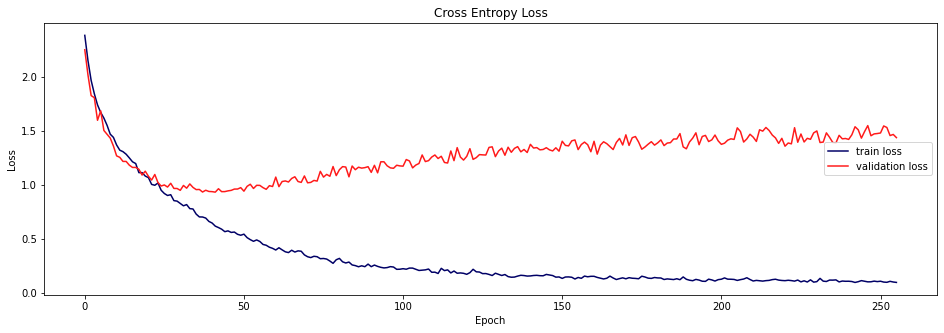

In [ ]:
# plot loss
plt.rcParams["figure.figsize"] = (16,11)
ax = plt.subplot(212)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='#000066', label='train')
plt.plot(history.history['val_loss'], color='#ff1a1a', label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train loss', 'validation loss'], loc='right')
plt.show()

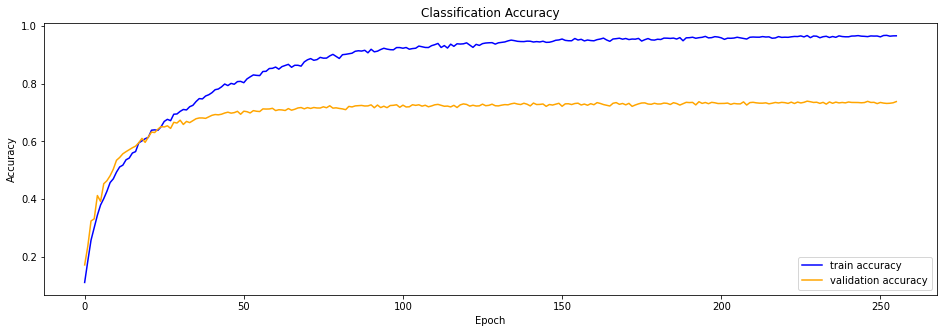

In [ ]:
# plot accuracy
plt.rcParams["figure.figsize"] = (16,11)
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()